# 프로그래밍 언어사이의 연관 규칙 분석

# 프로젝트 개요

## 프로젝트 목표
- 기계학습 라이브러리를 통한 연관규칙분석

## 문제 정의
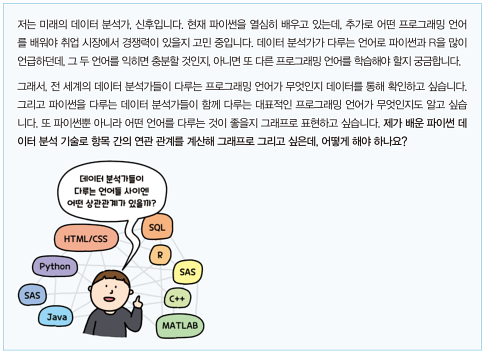

# 연관 규칙 분석

## 개념

- 연관 규칙 분석(Association Rule Analysis) or 장바구니 분석(Market Basker Analysis)
- 상품이나 서비스를 구매하는 등의 일련의 거래나 사건 안에 존재하는 항목 간의 연관 규칙을 발견하는 분석

- A를 구매하면, B를 구매할 가능성이 높다.


> 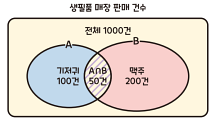



## 지지도(Support)

- 전체 거래 중 A(조건, Antecedents)와 B(결과, Consequent)가 동시에 판매되는 거래의 비율



> 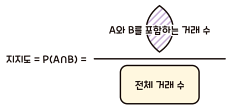




## 신뢰도(Confidence)
- A를 구매한 거래 중 B도 함계 구매한 거래의 비율


> 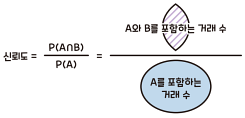




## 향상도(Lift)
- 전체 건수에서 B를 구매한 비율 대비 A를 구매했을때 B를 구매한 비율(신뢰도)의 증가 비율

> 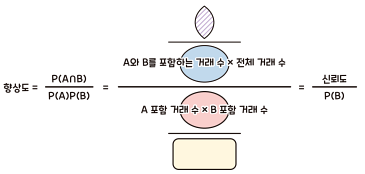




## 어프라이어리(Apriori)
- 연관 규칙을 추출하려면 각 항목이 항목 집합안에서 어떤 빈도로 출현했고 어떤 항목과 함께 출현했는지 파악
- 데이터 셋이 큰 경우 모든 후보 항목 집합을 하나씩 검사하는 것은 굉장히 비효율
- 이러한 문제 해결을 위한 알고리즘이 Apriori 
- Apriori : 빈발 항목 집합을 추출


# 데이터 수집 및 가공

# 새 섹션

## 데이터 적재

In [6]:
import pandas as pd

raw_data = pd.read_csv('survey_results_public.csv')

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [7]:
raw_data.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


## 개발자 타입(DevType) 열 데이터 확인

In [8]:
raw_data['DevType']

0                                                      NaN
1                                                      NaN
2        Data scientist or machine learning specialist;...
3                                    Developer, full-stack
4        Developer, front-end;Developer, full-stack;Dev...
                               ...                        
73263                                  Developer, back-end
73264        Data scientist or machine learning specialist
73265    Developer, full-stack;Developer, desktop or en...
73266    Developer, front-end;Developer, desktop or ent...
73267    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 73268, dtype: object

## 문자열을 리스트로 변환

In [9]:
# 문자열을 리스트로 변환
dev_type = raw_data['DevType'].str.split(';')
dev_type

0                                                      NaN
1                                                      NaN
2        [Data scientist or machine learning specialist...
3                                  [Developer, full-stack]
4        [Developer, front-end, Developer, full-stack, ...
                               ...                        
73263                                [Developer, back-end]
73264      [Data scientist or machine learning specialist]
73265    [Developer, full-stack, Developer, desktop or ...
73266    [Developer, front-end, Developer, desktop or e...
73267    [Developer, front-end, Engineer, data, Enginee...
Name: DevType, Length: 73268, dtype: object

## 결손치 제거
- Method : dropna()

In [10]:
# 결손치 제거

dev_type.dropna(inplace=True)
dev_type

2        [Data scientist or machine learning specialist...
3                                  [Developer, full-stack]
4        [Developer, front-end, Developer, full-stack, ...
7                         [Developer, full-stack, Student]
8                                    [Developer, back-end]
                               ...                        
73263                                [Developer, back-end]
73264      [Data scientist or machine learning specialist]
73265    [Developer, full-stack, Developer, desktop or ...
73266    [Developer, front-end, Developer, desktop or e...
73267    [Developer, front-end, Engineer, data, Enginee...
Name: DevType, Length: 61302, dtype: object

## 리스트 항목을 각 열로 나누기
- Method : explode()

In [11]:
exploded_dev_type = dev_type.explode()
exploded_dev_type

2        Data scientist or machine learning specialist
2                                 Developer, front-end
2                                       Engineer, data
2                           Engineer, site reliability
3                                Developer, full-stack
                             ...                      
73267                         Data or business analyst
73267                                         Designer
73267                                        Scientist
73267                                  Product manager
73267                             System administrator
Name: DevType, Length: 164790, dtype: object

## 유일한 값 확인 
- Method : unique()
- 데이터 분석가 : Data scientist or machine learning specialist와 Data or Business analyst

In [12]:
exploded_dev_type.unique()

array(['Data scientist or machine learning specialist',
       'Developer, front-end', 'Engineer, data',
       'Engineer, site reliability', 'Developer, full-stack',
       'Developer, back-end',
       'Developer, desktop or enterprise applications',
       'Developer, QA or test', 'Student', 'Developer, mobile',
       'Educator', 'Engineering manager', 'Database administrator',
       'Academic researcher', 'DevOps specialist',
       'Other (please specify):',
       'Developer, embedded applications or devices',
       'Developer, game or graphics', 'Project manager',
       'Cloud infrastructure engineer', 'Data or business analyst',
       'Designer', 'Scientist', 'Product manager',
       'Senior Executive (C-Suite, VP, etc.)', 'System administrator',
       'Blockchain', 'Marketing or sales professional',
       'Security professional'], dtype=object)

## 두 항목을 포함한 리스트 항목 데이터 추출
- Method : isin()

In [13]:
# 데이터 분석가 데이터만 추출
data_analyst_data = raw_data[raw_data['DevType'].isin(['Data scientist or machine learning specialist', 'Data or business analyst'])]

data_analyst_data['DevType']

240                           Data or business analyst
400                           Data or business analyst
463      Data scientist or machine learning specialist
1089     Data scientist or machine learning specialist
1704     Data scientist or machine learning specialist
                             ...                      
73053                         Data or business analyst
73054                         Data or business analyst
73064    Data scientist or machine learning specialist
73204                         Data or business analyst
73264    Data scientist or machine learning specialist
Name: DevType, Length: 742, dtype: object

## 프로그래밍 언어 데이터 추출
- LanguageHaveWorkedWith

In [14]:
# 프로그래밍 언어 데이터 추출
languages = data_analyst_data['LanguageHaveWorkedWith']
languages

240                   HTML/CSS;Python;Ruby;SQL;VBA
400                      Bash/Shell;C++;Python;SQL
463                          Bash/Shell;Python;SQL
1089                                        Python
1704             Elixir;Python;Rust;SQL;TypeScript
                           ...                    
73053                        PowerShell;Python;SQL
73054                                            R
73064                        Java;Python;Scala;SQL
73204          Bash/Shell;HTML/CSS;Julia;R;SQL;VBA
73264    Bash/Shell;HTML/CSS;JavaScript;Python;SQL
Name: LanguageHaveWorkedWith, Length: 742, dtype: object

## 데이터 문자열 변환 후 구분자(;)로 구분

In [15]:
languages = languages.str.split(';')
languages

240                   [HTML/CSS, Python, Ruby, SQL, VBA]
400                       [Bash/Shell, C++, Python, SQL]
463                            [Bash/Shell, Python, SQL]
1089                                            [Python]
1704             [Elixir, Python, Rust, SQL, TypeScript]
                              ...                       
73053                          [PowerShell, Python, SQL]
73054                                                [R]
73064                         [Java, Python, Scala, SQL]
73204         [Bash/Shell, HTML/CSS, Julia, R, SQL, VBA]
73264    [Bash/Shell, HTML/CSS, JavaScript, Python, SQL]
Name: LanguageHaveWorkedWith, Length: 742, dtype: object

In [16]:
# 리스트 항목을 행으로 나누기, explode()
exploded_languages = languages.explode()
exploded_languages

240        HTML/CSS
240          Python
240            Ruby
240             SQL
240             VBA
            ...    
73264    Bash/Shell
73264      HTML/CSS
73264    JavaScript
73264        Python
73264           SQL
Name: LanguageHaveWorkedWith, Length: 2566, dtype: object

## 데이터 확인 
- 각 프로그래밍 언어의 빈도를 구하기 위해 : groupby()
- 각 그룹의 크기 확인 : size()

In [17]:
# 프로그래밍별 응답 수 구하기
size_by_languages = exploded_languages.groupby(exploded_languages).size()

# 데이터 빈도 역순으로 정렬
size_by_languages.sort_values(ascending=False, inplace=True)
size_by_languages

LanguageHaveWorkedWith
Python         624
SQL            440
R              213
Bash/Shell     174
JavaScript     169
HTML/CSS       147
C++            113
Java            85
VBA             70
C               66
C#              50
PowerShell      46
TypeScript      41
MATLAB          41
Julia           39
SAS             33
Scala           29
Go              22
Rust            22
PHP             16
Kotlin          10
Swift           10
Dart             9
Ruby             9
Assembly         8
Lua              8
Haskell          8
LISP             7
Perl             7
Clojure          6
APL              5
Objective-C      5
Groovy           4
Solidity         4
Fortran          3
Delphi           2
F#               2
Elixir           2
Crystal          1
OCaml            1
COBOL            1
Erlang           1
Name: LanguageHaveWorkedWith, dtype: int64

In [18]:
# !pip install apyori  #This installs the Apyori package for using the Association Mining Apriori algorithm
from apyori import apriori

In [19]:
# 데이터프레임 만들기 위한 딕셔너리 만들기
# AttributeError: 'Series' object has no attribute 'value' => 수정은 size_by_languages.value에서 value 제거
frame = {'language': size_by_languages.index, 'count': size_by_languages}

# 데이터프레임 만들기
size_by_languages_df = pd.DataFrame(frame)
size_by_languages_df.head()

,language,count
LanguageHaveWorkedWith,,
Python,Python,624
SQL,SQL,440
R,R,213
Bash/Shell,Bash/Shell,174
JavaScript,JavaScript,169


In [20]:
size_by_languages_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Python to Erlang
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   language  42 non-null     object
 1   count     42 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


# 워드클라우드와 트리맵
- Wordcloud, Tag Cloud : 메타데이터에서 얻어진 태그들을 분석해 중요도나 인기도 등을 고려해 시각적으로 표시

## 라이브러리 탑재


In [21]:
# 매트플랏립 라이브러리 탑재
import matplotlib.pyplot as plt

# wordcloud 라이브러리 탑재
from wordcloud import WordCloud

## Wordcloud 만들기

- DataFrame -> Dictionary로변경
- Method : generate_from_frequencies()

In [22]:
# 데이터프레임을 딕셔너리로 변경
size_by_languages.to_dict()

{'Python': 624,
 'SQL': 440,
 'R': 213,
 'Bash/Shell': 174,
 'JavaScript': 169,
 'HTML/CSS': 147,
 'C++': 113,
 'Java': 85,
 'VBA': 70,
 'C': 66,
 'C#': 50,
 'PowerShell': 46,
 'TypeScript': 41,
 'MATLAB': 41,
 'Julia': 39,
 'SAS': 33,
 'Scala': 29,
 'Go': 22,
 'Rust': 22,
 'PHP': 16,
 'Kotlin': 10,
 'Swift': 10,
 'Dart': 9,
 'Ruby': 9,
 'Assembly': 8,
 'Lua': 8,
 'Haskell': 8,
 'LISP': 7,
 'Perl': 7,
 'Clojure': 6,
 'APL': 5,
 'Objective-C': 5,
 'Groovy': 4,
 'Solidity': 4,
 'Fortran': 3,
 'Delphi': 2,
 'F#': 2,
 'Elixir': 2,
 'Crystal': 1,
 'OCaml': 1,
 'COBOL': 1,
 'Erlang': 1}

In [23]:
# 워드클라우드 만들기
wordcloud = WordCloud(background_color = 'white').generate_from_frequencies(size_by_languages.to_dict())
wordcloud

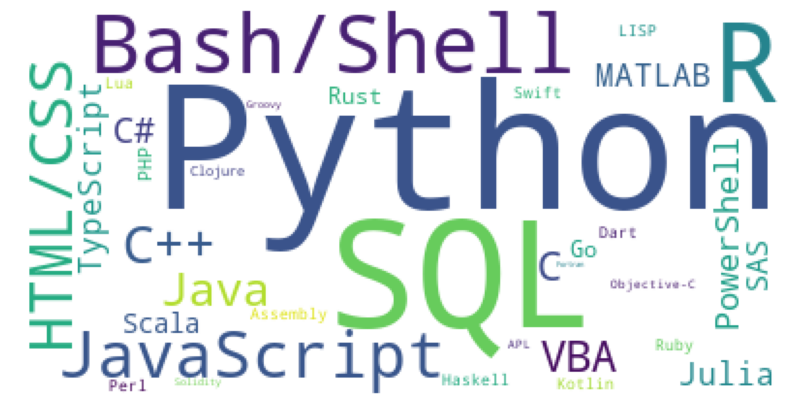

In [24]:
# wordcloud 그리기
plt.rcParams['figure.figsize'] = (10, 10)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Treemap
- 직사각형을 여러 개의 작은 직사각형으로 분할한 그래프
- Method : treemap()

In [25]:
# plotly.express 모듈 탑재
import plotly.express as px

# treemap 그리기
fig = px.treemap(size_by_languages_df, path=['language'], values='count')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

# 데이터 학습 및 시각화

## 데이터 2차 가공

In [ ]:
# 결손치 제거
languages.dropna(inplace=True)

# 필터링을 위한 List 변환
lang_list = languages.to_list()

# 일부 값 확인
lang_list[:10]

[['HTML/CSS', 'Python', 'Ruby', 'SQL', 'VBA'],
 ['Bash/Shell', 'C++', 'Python', 'SQL'],
 ['Bash/Shell', 'Python', 'SQL'],
 ['Python'],
 ['Elixir', 'Python', 'Rust', 'SQL', 'TypeScript'],
 ['Python'],
 ['Bash/Shell',
  'C++',
  'HTML/CSS',
  'JavaScript',
  'Python',
  'Rust',
  'SQL',
  'TypeScript'],
 ['Python', 'SQL'],
 ['Bash/Shell', 'Go', 'HTML/CSS', 'Python'],
 ['Bash/Shell', 'Python', 'Rust']]

In [ ]:
# 추출 대상 프로그래밍 언어 선정
target_langs = ['Python', 'R', 'SQL', 'MATLAB', 'Go', 'SAS', 'Scala', 'Julia', 'Java', 'JavaScript']

In [ ]:
# 필터링 완료된 프로그래밍 언어를 담기 위한 리스트 생성
revised_lang_list = []

# 필터링을 위해 전체 리스트 순회
for lang in lang_list:
    
    # 추출 대상 프로그래밍 언어만 필터링
    filtered = [x for x in lang if x in target_langs]
    
    # 해당 리스트에 파이썬이 있는 경우에만 학습 대상 리스트에 추가
#     if 'Python' in filtered:
#         revised_lang_list.append(filtered)
        
    revised_lang_list.append(filtered)

# 필터링 결과 확인
revised_lang_list

[['Python', 'SQL'],
 ['Python', 'SQL'],
 ['Python', 'SQL'],
 ['Python'],
 ['Python', 'SQL'],
 ['Python'],
 ['JavaScript', 'Python', 'SQL'],
 ['Python', 'SQL'],
 ['Go', 'Python'],
 ['Python'],
 ['Python'],
 ['Go', 'Java'],
 ['JavaScript', 'Python'],
 ['Python', 'R', 'SQL'],
 ['Julia', 'Python', 'R'],
 ['Python', 'SQL'],
 ['JavaScript', 'Python'],
 ['Python', 'SQL'],
 ['Julia', 'Python', 'R', 'SQL'],
 ['Python'],
 ['Python', 'R', 'SAS', 'SQL'],
 ['Python'],
 ['JavaScript', 'Python', 'SQL'],
 ['JavaScript', 'Python', 'R', 'SAS', 'SQL'],
 ['Python', 'Scala', 'SQL'],
 ['Python', 'R'],
 ['Python', 'R'],
 ['JavaScript', 'Python', 'R', 'SQL'],
 ['Python'],
 ['Python'],
 ['Python', 'R', 'SQL'],
 ['JavaScript', 'Python'],
 ['SQL'],
 ['Python', 'R', 'SQL'],
 ['Python', 'SQL'],
 ['Python'],
 ['Python', 'R', 'SQL'],
 ['Python'],
 ['Python'],
 ['Julia', 'Python', 'R', 'SQL'],
 ['Java', 'Python'],
 ['Python'],
 ['Python'],
 ['JavaScript', 'Python', 'SQL'],
 ['Java', 'JavaScript', 'Python'],
 ['JavaSc

## 데이터 전처리

In [ ]:
# 전처리 라이브러리 탑재
from mlxtend.preprocessing import TransactionEncoder

# 전처리기 생성
te = TransactionEncoder()

# 전처리 수행
te_ary = te.fit(revised_lang_list).transform(revised_lang_list)
te_ary

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False,  True, False, ..., False,  True,  True],
       [False, False, False, ..., False,  True, False],
       [False, False,  True, ..., False,  True, False]])

In [ ]:
# 전치리 결과를 데이터프레임으로 변환
new_languages = pd.DataFrame(te_ary, columns=te.columns_)
new_languages

,Go,Java,JavaScript,Julia,MATLAB,Python,R,SAS,SQL,Scala
0,False,False,False,False,False,True,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False
2,False,False,False,False,False,True,False,False,True,False
3,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
724,False,False,False,False,False,True,False,False,True,False
725,False,False,False,False,False,False,True,False,False,False
726,False,True,False,False,False,True,False,False,True,True
727,False,False,False,True,False,False,True,False,True,False


## 데이터 학습
- 지지도 구하기

In [ ]:
# 학습 알고리즘 탑재
from mlxtend.frequent_patterns import apriori, association_rules

# 지지도 구하기
freq_items = apriori(new_languages, min_support=0.01, use_colnames=True)

In [ ]:
# 학습 결과 확인
freq_items.sort_values(['support'], ascending=False).head(20)

,support,itemsets
5,0.855967,(Python)
8,0.603567,(SQL)
32,0.517147,"(SQL, Python)"
6,0.292181,(R)
30,0.237311,"(R, Python)"
2,0.231824,(JavaScript)
35,0.213992,"(R, SQL)"
20,0.211248,"(JavaScript, Python)"
64,0.182442,"(R, SQL, Python)"
22,0.160494,"(SQL, JavaScript)"


## 신뢰도와 향상도
- 항목 집합의 항목 개수를 포함한 데이터프레임이 필요
- Method : apply() : length 열에 추가
- Method : association_rules() : 신뢰도, 향상도 
 

In [ ]:
# 항목 집합의 항목 개수 추가
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
freq_items

,support,itemsets,length
0,0.030178,(Go),1
1,0.116598,(Java),1
2,0.231824,(JavaScript),1
3,0.053498,(Julia),1
4,0.056241,(MATLAB),1
...,...,...,...
78,0.017833,"(R, Julia, SQL, Python)",4
79,0.019204,"(R, SQL, MATLAB, Python)",4
80,0.021948,"(R, SQL, SAS, Python)",4
81,0.012346,"(Scala, R, SQL, Python)",4


In [ ]:
# 신뢰도와 향상도 구하기
rules = association_rules(freq_items, min_threshold=0.01)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Go),(JavaScript),0.030178,0.231824,0.013717,0.454545,1.960732,0.006721,1.408322
1,(JavaScript),(Go),0.231824,0.030178,0.013717,0.059172,1.960732,0.006721,1.030817
2,(Go),(Python),0.030178,0.855967,0.028807,0.954545,1.115166,0.002975,3.168724
3,(Python),(Go),0.855967,0.030178,0.028807,0.033654,1.115166,0.002975,1.003597
4,(Go),(SQL),0.030178,0.603567,0.017833,0.590909,0.979029,-0.000382,0.969060
...,...,...,...,...,...,...,...,...,...
437,(SQL),"(Java, R, JavaScript, Python)",0.603567,0.013717,0.013717,0.022727,1.656818,0.005438,1.009219
438,(Python),"(Java, R, SQL, JavaScript)",0.855967,0.013717,0.013717,0.016026,1.168269,0.001976,1.002346
439,(Java),"(R, SQL, JavaScript, Python)",0.116598,0.048011,0.013717,0.117647,2.450420,0.008119,1.078921
440,(R),"(Java, SQL, JavaScript, Python)",0.292181,0.043896,0.013717,0.046948,1.069542,0.000892,1.003203


 * antecedents : 조건이 되는 프로그래밍 언어 리스트
 * consequents : 결과가 되는 프로그래밍 언어 리스트
 * support : 지지도
 * confidence : 신뢰도
 * lift : 향상도

## 산점도 그래프
- Method : px.scatter(), update_layout()

In [ ]:
# 산점도 그래프 그리기
fig = px.scatter(
    rules['support'], 
    rules['confidence'],
    size=rules['lift'],
    color=rules['lift']
)

# 그래프 layout설정
fig.update_layout(
    xaxis_title='support', 
    yaxis_title='confidence', 
    font_family='Courer New', 
    font_color='blue', 
    title_font_family='Times New Roman', 
    title_font_color='red', 
    title=('Support vs Confience')
)

# 출력
fig.show()

## 산점도 그래프 수정

In [ ]:
# frozenset 데이터를 문자열로 변환하여 열 추가
rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ','.join(list(x)))
rules['consequents_str'] = rules['consequents'].apply(lambda x: ','.join(list(x)))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_str,consequents_str
0,(Go),(JavaScript),0.030178,0.231824,0.013717,0.454545,1.960732,0.006721,1.408322,Go,JavaScript
1,(JavaScript),(Go),0.231824,0.030178,0.013717,0.059172,1.960732,0.006721,1.030817,JavaScript,Go
2,(Go),(Python),0.030178,0.855967,0.028807,0.954545,1.115166,0.002975,3.168724,Go,Python
3,(Python),(Go),0.855967,0.030178,0.028807,0.033654,1.115166,0.002975,1.003597,Python,Go
4,(Go),(SQL),0.030178,0.603567,0.017833,0.590909,0.979029,-0.000382,0.969060,Go,SQL
...,...,...,...,...,...,...,...,...,...,...,...
437,(SQL),"(Java, R, JavaScript, Python)",0.603567,0.013717,0.013717,0.022727,1.656818,0.005438,1.009219,SQL,"Java,R,JavaScript,Python"
438,(Python),"(Java, R, SQL, JavaScript)",0.855967,0.013717,0.013717,0.016026,1.168269,0.001976,1.002346,Python,"Java,R,SQL,JavaScript"
439,(Java),"(R, SQL, JavaScript, Python)",0.116598,0.048011,0.013717,0.117647,2.450420,0.008119,1.078921,Java,"R,SQL,JavaScript,Python"
440,(R),"(Java, SQL, JavaScript, Python)",0.292181,0.043896,0.013717,0.046948,1.069542,0.000892,1.003203,R,"Java,SQL,JavaScript,Python"


In [ ]:
# 산점도 그래프 그리기
fig=px.scatter(
    rules,
    x='support', 
    y='confidence', 
    size='lift', 
    color='lift',
    hover_data=['antecedents_str', 'consequents_str']
)

# 그래프 레이아웃 설정
fig.update_layout(
    xaxis_title='support',
    yaxis_title='confidence',
    font_family='Courier New',
    font_color='blue',
    title_font_family='Times New Roman',
    title_font_color='red',
    title=('Support vs Confidence')
    
)

# 그래프 출력
fig.show()

## 히트맵

In [ ]:
# 항목이 하나인 값만 필터링하기
rules_for_single = rules[rules.apply(lambda x: (len(x['antecedents']) == 1 and len(x['consequents']) == 1), axis=1)]
rules_for_single.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_str,consequents_str
0,(Go),(JavaScript),0.030178,0.231824,0.013717,0.454545,1.960732,0.006721,1.408322,Go,JavaScript
1,(JavaScript),(Go),0.231824,0.030178,0.013717,0.059172,1.960732,0.006721,1.030817,JavaScript,Go
2,(Go),(Python),0.030178,0.855967,0.028807,0.954545,1.115166,0.002975,3.168724,Go,Python
3,(Python),(Go),0.855967,0.030178,0.028807,0.033654,1.115166,0.002975,1.003597,Python,Go
4,(Go),(SQL),0.030178,0.603567,0.017833,0.590909,0.979029,-0.000382,0.969060,Go,SQL
5,(SQL),(Go),0.603567,0.030178,0.017833,0.029545,0.979029,-0.000382,0.999348,SQL,Go
6,(Java),(JavaScript),0.116598,0.231824,0.064472,0.552941,2.385172,0.037442,1.718287,Java,JavaScript
7,(JavaScript),(Java),0.231824,0.116598,0.064472,0.278107,2.385172,0.037442,1.223729,JavaScript,Java
8,(Java),(Python),0.116598,0.855967,0.098765,0.847059,0.989593,-0.001039,0.941754,Java,Python
9,(Python),(Java),0.855967,0.116598,0.098765,0.115385,0.989593,-0.001039,0.998628,Python,Java


In [ ]:
# 프로그래밍 언어 문자열로 추출
rules_for_single_df = pd.DataFrame(rules_for_single['antecedents'].apply(lambda x: list(x)[0]))
rules_for_single_df['consequents'] = rules_for_single['consequents'].apply(lambda x: list(x)[0])
rules_for_single_df['confidence'] = rules_for_single['confidence']

rules_for_single_df.head(20)

,antecedents,consequents,confidence
0,Go,JavaScript,0.454545
1,JavaScript,Go,0.059172
2,Go,Python,0.954545
3,Python,Go,0.033654
4,Go,SQL,0.590909
5,SQL,Go,0.029545
6,Java,JavaScript,0.552941
7,JavaScript,Java,0.278107
8,Java,Python,0.847059
9,Python,Java,0.115385


In [ ]:
# 히트맵용 데이터프레임 생성, 색인은 대상 프로그래밍 언어로 설정
revised_rules_df = pd.DataFrame(index=target_langs)

# 대상 프로그래밍 언어 순회
for col in target_langs:
    
    # 열 설정을 위한 빈 리스트 생성
    col_conf = []
    for row in target_langs:
        
        # 신뢰도 확보, 조건 언어는 줄, 결과 언어는 행으로 설정
        confidence = rules_for_single_df[rules_for_single_df['antecedents'] == row][rules_for_single_df['consequents'] == col]['confidence']
        
        # 신뢰도 값이 존재하는 경우에만 행에 값 추가
        if len(confidence.values) > 0:
            col_conf.append(confidence.values[0])
            
        # 그렇지 않은 경우 0 설정
        else:
            col_conf.append(0)
            
    # 완성된 열을 데이터프레임에 추가
    revised_rules_df[col] = col_conf
        
# 최종 데이터프레임 값 확인
revised_rules_df

<ipython-input-105-6d948c0fc943>:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Python,R,SQL,MATLAB,Go,SAS,Scala,Julia,Java,JavaScript
Python,0.000000,0.277244,0.604167,0.065705,0.033654,0.043269,0.044872,0.051282,0.115385,0.246795
R,0.812207,0.000000,0.732394,0.079812,0.000000,0.098592,0.065728,0.098592,0.070423,0.169014
SQL,0.856818,0.354545,0.000000,0.068182,0.029545,0.072727,0.047727,0.047727,0.127273,0.265909
MATLAB,1.000000,0.414634,0.731707,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.219512
Go,0.954545,0.000000,0.590909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.454545
SAS,0.818182,0.636364,0.969697,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Scala,0.965517,0.482759,0.724138,0.000000,0.000000,0.000000,0.000000,0.000000,0.344828,0.310345
Julia,0.820513,0.538462,0.538462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230769
Java,0.847059,0.176471,0.658824,0.000000,0.000000,0.000000,0.117647,0.000000,0.000000,0.552941
JavaScript,0.911243,0.213018,0.692308,0.053254,0.059172,0.000000,0.053254,0.053254,0.278107,0.000000


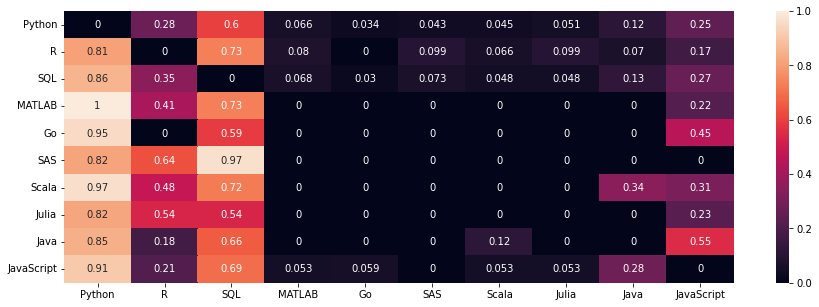

In [ ]:
# Seaborn 라이브러리 탑재
import seaborn as sns

# 히트맵 크기 설정
plt.figure(figsize=(15, 5))

# 히트맵 그리기
heatmap = sns.heatmap(revised_rules_df, annot=True)